In [15]:
import numpy as np
import pandas as pd
from numpy import corrcoef
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [32]:
food = pd.read_csv('../data/Food Prices/millet_price.csv')
conf = pd.read_csv('../data/Conflict Data/conflict_numb.csv')
idps = pd.read_csv('../data/IDPs Data/idps_mali.csv')
lean = pd.read_csv('../data/Cadre Harmonise/lean.csv')


mopti = ['Bandiagara','Bankass','Djenne','Douentza','Koro','Mopti','Tenenkou','Youwarou']
tombouctou = ['Dire','Gourma-Rharous','Niafunke'] # Goundam and Tombouctou were not considered in the Liptako-Gourma study as adm2
gao = ['Ansongo','Bourem','Gao','Menaka']
nord = ['Loroum','Yatenga']
sahel = ['Oudalan','Seno','Soum','Yagha']
est = ['Komonjdjari']
tahoua = ['Tahoua','Tassara','Tillia']
tillaberi = ['Banibangou','Filingue','Kollo','Ouallam','Say','Tera','Tillaberi']

In [33]:
food

,reference_year,adm0_name,adm1_name,actual_price,decade_price,lg_decade_price,var_price,lg_var_price
0,2011,Burkina Faso,Est,150.333333,184.108106,224.214222,33.774772,73.880889
1,2011,Burkina Faso,Nord,167.000000,200.911874,224.214222,33.911874,57.214222
2,2011,Burkina Faso,Sahel,182.638889,229.209549,224.214222,46.570660,41.575333
3,2011,Mali,Gao,183.261905,251.088396,224.214222,67.826492,40.952317
4,2011,Mali,Mopti,134.787302,192.261088,224.214222,57.473786,89.426921
5,2011,Mali,Tombouctou,183.136905,246.583972,224.214222,63.447068,41.077317
6,2011,Niger,Tahoua,196.238583,230.617368,224.214222,34.378784,27.975639
7,2011,Niger,Tillaberi,212.367487,244.791965,224.214222,32.424478,11.846735
8,2012,Burkina Faso,Est,226.138892,184.108106,224.214222,42.030786,1.924670
9,2012,Burkina Faso,Nord,247.862381,200.911874,224.214222,46.950507,23.648159


In [34]:
conf

,reference_year,adm0_name,adm1_name,adm2_name,conflicts,fatalities,projected_conflicts,projected_fatalities
0,2014,Burkina Faso,Est,Komonjdjari,0,0,0,0
1,2014,Burkina Faso,Nord,Loroum,0,0,0,0
2,2014,Burkina Faso,Nord,Yatenga,1,3,1,3
3,2014,Burkina Faso,Sahel,Oudalan,0,0,0,0
4,2014,Burkina Faso,Sahel,Seno,0,0,0,0
5,2014,Burkina Faso,Sahel,Soum,0,0,0,0
6,2014,Burkina Faso,Sahel,Yagha,0,0,0,0
7,2014,Mali,Gao,Ansongo,4,9,4,9
8,2014,Mali,Gao,Bourem,8,13,8,13
9,2014,Mali,Gao,Gao,14,82,14,82


In [35]:
idps

,reference_year,adm0_name,adm1_name,adm2_name,projected_idps,diff_last_year
0,2014,Mali,Gao,Ansongo,1888,0
1,2014,Mali,Gao,Bourem,1484,0
2,2014,Mali,Gao,Gao,1794,0
3,2014,Mali,Gao,Menaka,2079,0
4,2014,Mali,Mopti,Bandiagara,80,0
5,2014,Mali,Mopti,Bankass,37,0
6,2014,Mali,Mopti,Djenne,56,0
7,2014,Mali,Mopti,Douentza,89,0
8,2014,Mali,Mopti,Koro,262,0
9,2014,Mali,Mopti,Mopti,3804,0


In [36]:
lean

,adm0_name,adm1_name,adm2_name,population,phase_class,phase35,reference_year,p35_density
0,Burkina Faso,Est,Komonjdjari,105540,3,21108,2014,0.200000
1,Burkina Faso,Nord,Loroum,177109,2,0,2014,0.000000
2,Burkina Faso,Nord,Yatenga,678703,2,0,2014,0.000000
3,Burkina Faso,Sahel,Oudalan,251998,3,50400,2014,0.200002
4,Burkina Faso,Sahel,Seno,331150,3,66230,2014,0.200000
5,Burkina Faso,Sahel,Soum,440647,3,88129,2014,0.199999
6,Burkina Faso,Sahel,Yagha,203315,2,0,2014,0.000000
7,Mali,Gao,Ansongo,157184,3,56586,2014,0.359998
8,Mali,Gao,Bourem,138610,4,62374,2014,0.449996
9,Mali,Gao,Gao,285337,3,156935,2014,0.549999


In [37]:
# Add adm2_name in millet
#millet = food
millet = pd.DataFrame(columns=['reference_year','adm0_name','adm1_name','adm2_name','actual_price','decade_price','lg_decade_price','var_price','lg_var_price'])

for index, row in food.iterrows():
    if row.reference_year > 2013:
        if row.adm1_name =='Est':
            for adm2 in est:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Nord':
            for adm2 in nord:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Sahel':
            for adm2 in sahel:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Gao':
            for adm2 in gao:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Mopti':
            for adm2 in mopti:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name =='Tombouctou':
            for adm2 in tombouctou:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Tahoua':
            for adm2 in tahoua:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 
        elif row.adm1_name == 'Tillaberi':
            for adm2 in tillaberi:
                millet = millet.append(pd.Series([row['reference_year'],row['adm0_name'],row['adm1_name'],adm2,row['actual_price'],row['decade_price'],row['lg_decade_price'],row['var_price'],row['lg_var_price']],index=millet.columns),ignore_index=True) 

            
millet

#millet

,reference_year,adm0_name,adm1_name,adm2_name,actual_price,decade_price,lg_decade_price,var_price,lg_var_price
0,2014,Burkina Faso,Est,Komonjdjari,197.300000,184.108106,224.214222,13.191894,26.914222
1,2014,Burkina Faso,Nord,Loroum,190.403450,200.911874,224.214222,10.508424,33.810772
2,2014,Burkina Faso,Nord,Yatenga,190.403450,200.911874,224.214222,10.508424,33.810772
3,2014,Burkina Faso,Sahel,Oudalan,230.933333,229.209549,224.214222,1.723785,6.719111
4,2014,Burkina Faso,Sahel,Seno,230.933333,229.209549,224.214222,1.723785,6.719111
5,2014,Burkina Faso,Sahel,Soum,230.933333,229.209549,224.214222,1.723785,6.719111
6,2014,Burkina Faso,Sahel,Yagha,230.933333,229.209549,224.214222,1.723785,6.719111
7,2014,Mali,Gao,Ansongo,211.675000,251.088396,224.214222,39.413396,12.539222
8,2014,Mali,Gao,Bourem,211.675000,251.088396,224.214222,39.413396,12.539222
9,2014,Mali,Gao,Gao,211.675000,251.088396,224.214222,39.413396,12.539222


In [38]:
tot = pd.DataFrame(columns=['reference_year','adm0_name','adm1_name','adm2_name','population','phase_class','phase35','p35_density','actual_price','decade_price','lg_decade_price','var_price','lg_var_price','conflicts','fatalities'])
tot['reference_year'] = lean['reference_year']
tot['adm0_name'] = lean['adm0_name']
tot['adm1_name'] = lean['adm1_name']
tot['adm2_name'] = lean['adm2_name']
tot['population'] = lean['population']
tot['phase_class'] = lean['phase_class']
tot['phase35'] = lean['phase35']
tot['p35_density'] = lean['p35_density']
tot['actual_price'] = millet['actual_price']
tot['decade_price'] = millet['decade_price']
tot['lg_decade_price'] = millet['lg_decade_price']
tot['var_price'] = millet['var_price']
tot['lg_var_price'] = millet['lg_var_price']
tot['conflicts'] = conf['conflicts']
tot['fatalities'] = conf['fatalities']

tot


,reference_year,adm0_name,adm1_name,adm2_name,population,phase_class,phase35,p35_density,actual_price,decade_price,lg_decade_price,var_price,lg_var_price,conflicts,fatalities
0,2014,Burkina Faso,Est,Komonjdjari,105540,3,21108,0.200000,197.300000,184.108106,224.214222,13.191894,26.914222,0,0
1,2014,Burkina Faso,Nord,Loroum,177109,2,0,0.000000,190.403450,200.911874,224.214222,10.508424,33.810772,0,0
2,2014,Burkina Faso,Nord,Yatenga,678703,2,0,0.000000,190.403450,200.911874,224.214222,10.508424,33.810772,1,3
3,2014,Burkina Faso,Sahel,Oudalan,251998,3,50400,0.200002,230.933333,229.209549,224.214222,1.723785,6.719111,0,0
4,2014,Burkina Faso,Sahel,Seno,331150,3,66230,0.200000,230.933333,229.209549,224.214222,1.723785,6.719111,0,0
5,2014,Burkina Faso,Sahel,Soum,440647,3,88129,0.199999,230.933333,229.209549,224.214222,1.723785,6.719111,0,0
6,2014,Burkina Faso,Sahel,Yagha,203315,2,0,0.000000,230.933333,229.209549,224.214222,1.723785,6.719111,0,0
7,2014,Mali,Gao,Ansongo,157184,3,56586,0.359998,211.675000,251.088396,224.214222,39.413396,12.539222,4,9
8,2014,Mali,Gao,Bourem,138610,4,62374,0.449996,211.675000,251.088396,224.214222,39.413396,12.539222,8,13
9,2014,Mali,Gao,Gao,285337,3,156935,0.549999,211.675000,251.088396,224.214222,39.413396,12.539222,14,82


In [39]:
mali = tot[tot.adm0_name=='Mali'].reset_index(drop=True)
mali['projected_idps'] = idps['projected_idps']
mali['diff_last_year'] = idps['diff_last_year']
mali

,reference_year,adm0_name,adm1_name,adm2_name,population,phase_class,phase35,p35_density,actual_price,decade_price,lg_decade_price,var_price,lg_var_price,conflicts,fatalities,projected_idps,diff_last_year
0,2014,Mali,Gao,Ansongo,157184,3,56586,0.359998,211.675000,251.088396,224.214222,39.413396,12.539222,4,9,1888,0
1,2014,Mali,Gao,Bourem,138610,4,62374,0.449996,211.675000,251.088396,224.214222,39.413396,12.539222,8,13,1484,0
2,2014,Mali,Gao,Gao,285337,3,156935,0.549999,211.675000,251.088396,224.214222,39.413396,12.539222,14,82,1794,0
3,2014,Mali,Gao,Menaka,64869,4,25948,0.400006,211.675000,251.088396,224.214222,39.413396,12.539222,4,7,2079,0
4,2014,Mali,Mopti,Bandiagara,373461,4,224077,0.600001,174.781667,192.261088,224.214222,17.479421,49.432555,0,0,80,0
5,2014,Mali,Mopti,Bankass,315462,1,6309,0.019999,174.781667,192.261088,224.214222,17.479421,49.432555,0,0,37,0
6,2014,Mali,Mopti,Djenne,248309,2,12415,0.049998,174.781667,192.261088,224.214222,17.479421,49.432555,0,0,56,0
7,2014,Mali,Mopti,Douentza,293836,3,79336,0.270001,174.781667,192.261088,224.214222,17.479421,49.432555,1,1,89,0
8,2014,Mali,Mopti,Koro,431997,1,30240,0.070000,174.781667,192.261088,224.214222,17.479421,49.432555,0,0,262,0
9,2014,Mali,Mopti,Mopti,439524,1,13186,0.030001,174.781667,192.261088,224.214222,17.479421,49.432555,0,0,3804,0


In [43]:
#mali[mali.reference_year==2020].corr()



# Just like this it makes absolutely no sense
mali.corr()

,reference_year,population,phase_class,phase35,p35_density,actual_price,decade_price,lg_decade_price,var_price,lg_var_price,conflicts,fatalities,projected_idps,diff_last_year
reference_year,1.000000e+00,9.495727e-02,1.083944e-01,0.045831,-6.489514e-02,3.517837e-01,-4.761195e-18,0.000000e+00,-4.731336e-01,-7.708934e-02,5.129293e-01,5.069629e-01,5.581324e-01,5.341637e-01
population,9.495727e-02,1.000000e+00,-3.648649e-01,0.254167,-2.310067e-01,-4.693274e-01,-6.373534e-01,8.715859e-17,-7.480656e-02,2.157726e-01,3.017657e-01,2.358663e-01,2.197635e-01,2.297488e-01
phase_class,1.083944e-01,-3.648649e-01,1.000000e+00,0.620950,8.495940e-01,3.771093e-01,4.252680e-01,2.567295e-16,-4.171137e-02,-2.261556e-01,2.751675e-01,2.878152e-01,2.791151e-01,2.337040e-01
phase35,4.583142e-02,2.541672e-01,6.209498e-01,1.000000,7.870688e-01,-2.694639e-02,-1.289682e-02,0.000000e+00,-5.778450e-02,-5.680004e-02,3.754516e-01,3.300260e-01,3.469835e-01,3.240659e-01
p35_density,-6.489514e-02,-2.310067e-01,8.495940e-01,0.787069,1.000000e+00,2.438398e-01,3.588239e-01,-4.212123e-16,9.262626e-03,-2.005581e-01,1.620787e-01,1.937101e-01,2.500131e-01,2.202609e-01
actual_price,3.517837e-01,-4.693274e-01,3.771093e-01,-0.026946,2.438398e-01,1.000000e+00,7.685979e-01,-6.134555e-16,-1.592349e-01,-4.104836e-01,1.241767e-01,8.708508e-02,1.385718e-01,1.116054e-01
decade_price,-4.761195e-18,-6.373534e-01,4.252680e-01,-0.012897,3.588239e-01,7.685979e-01,1.000000e+00,5.414159e-16,5.946962e-02,-3.433780e-01,-1.216983e-01,-1.326681e-01,6.239138e-02,2.111550e-02
lg_decade_price,0.000000e+00,8.715859e-17,2.567295e-16,0.000000,-4.212123e-16,-6.134555e-16,5.414159e-16,1.000000e+00,-1.060752e-15,2.760998e-16,6.770121e-17,-5.409181e-16,3.979246e-16,2.542898e-16
var_price,-4.731336e-01,-7.480656e-02,-4.171137e-02,-0.057785,9.262626e-03,-1.592349e-01,5.946962e-02,-1.060752e-15,1.000000e+00,-1.529547e-01,-2.305670e-01,-2.313577e-01,-2.608862e-01,-2.065766e-01
lg_var_price,-7.708934e-02,2.157726e-01,-2.261556e-01,-0.056800,-2.005581e-01,-4.104836e-01,-3.433780e-01,2.760998e-16,-1.529547e-01,1.000000e+00,-4.663420e-02,-2.489848e-02,6.452873e-02,5.907935e-02


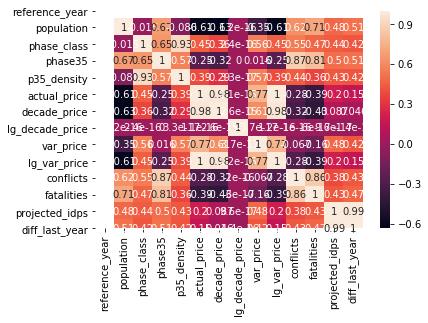

In [25]:
sns.heatmap(mali[mali['reference_year']==2020].corr(), annot=True)
plt.show()


## Statistical Test for Correlation

Now we will know about statistics test for correlation. 
Suppose we want extra assurance that two variables are correlated. 
We could perform a statistical test that tests:

* H0 : 𝜌 = 0
* H1 : 𝜌 != 0
 
(Where 𝜌 is the population, or “true”, correlation.) This test is provided for in SciPy.


In [56]:
pearsonr(mali.fatalities,mali.projected_idps)


(0.46253434767846296, 1.1843456542563759e-07)

The first number in the returned tuple is the computed sample correlation coefficient 𝑟, and the second number is the p-value of the test. 
In this case, the evidence that there is any non-zero correlation is strong. That said, just because we can conclude that the correlation is not zero does not mean that the correlation is meaningful.

https://medium.com/analytics-vidhya/basic-of-correlations-and-using-pandas-and-scipy-for-calculating-correlations-2d16c2bd6af0

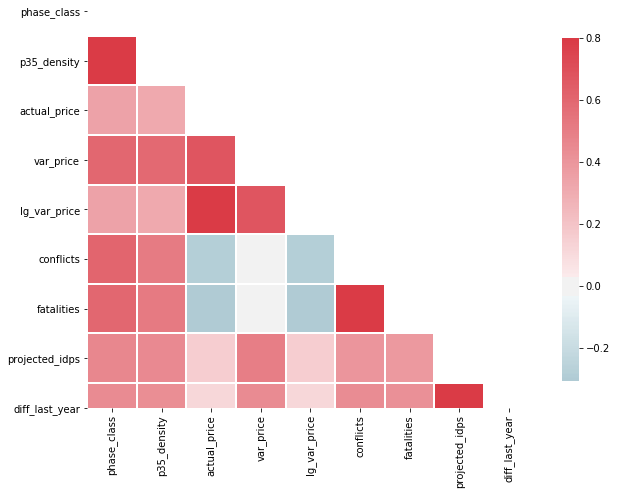

In [119]:
# Compute the correlation matrix
corr = mali[mali['reference_year']==2020][['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities','projected_idps','diff_last_year']].corr()
#mali[mali['reference_year']==2020][['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities','projected_idps','diff_last_year']]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7})


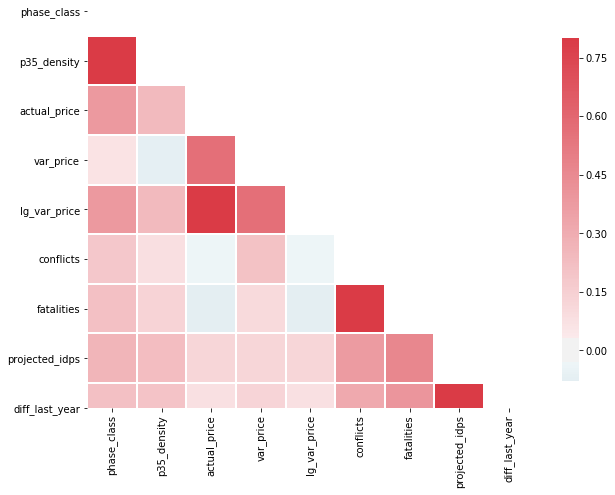

In [132]:
# Compute the correlation matrix
corr = mali[['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities','projected_idps','diff_last_year']].corr()
#mali[mali['reference_year']==2020][['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities','projected_idps','diff_last_year']]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7})


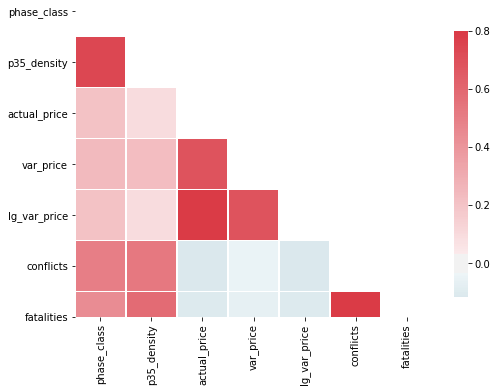

In [130]:
# Compute the correlation matrix
corr = tot[tot['reference_year']==2020][['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities']].corr()
#mali[mali['reference_year']==2020][['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities','projected_idps','diff_last_year']]
#corr = tot[['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7})


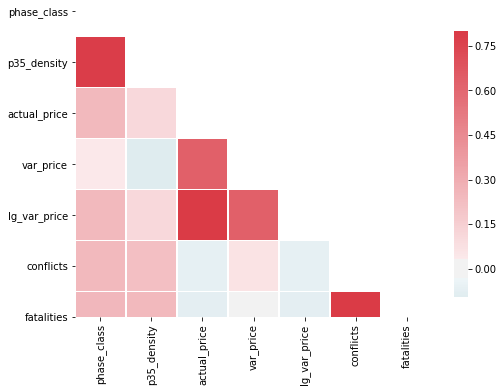

In [131]:
corr = tot[['phase_class','p35_density','actual_price','var_price','lg_var_price','conflicts','fatalities']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7})


In [127]:
tot.corr()

,reference_year,population,phase_class,phase35,p35_density,actual_price,decade_price,lg_decade_price,var_price,lg_var_price,conflicts,fatalities
reference_year,1.000000e+00,1.059586e-01,2.299458e-01,1.935294e-01,8.748986e-02,2.015164e-01,7.511861e-18,0.000000e+00,3.079118e-01,2.015164e-01,4.546006e-01,4.176926e-01
population,1.059586e-01,1.000000e+00,-1.225799e-01,3.038191e-01,-2.385452e-01,-2.700494e-02,-1.015147e-01,-2.938453e-16,7.898672e-02,-2.700494e-02,1.668690e-01,1.788937e-01
phase_class,2.299458e-01,-1.225799e-01,1.000000e+00,6.131278e-01,7.825940e-01,2.455649e-01,2.814435e-01,4.204209e-16,4.183179e-02,2.455649e-01,2.484310e-01,2.551884e-01
phase35,1.935294e-01,3.038191e-01,6.131278e-01,1.000000e+00,7.268414e-01,2.196958e-02,6.526884e-02,5.816527e-16,-4.374550e-02,2.196958e-02,4.104464e-01,4.500707e-01
p35_density,8.748986e-02,-2.385452e-01,7.825940e-01,7.268414e-01,1.000000e+00,1.091438e-01,2.214117e-01,-3.314143e-16,-9.550520e-02,1.091438e-01,2.261267e-01,2.450862e-01
actual_price,2.015164e-01,-2.700494e-02,2.455649e-01,2.196958e-02,1.091438e-01,1.000000e+00,7.563318e-01,1.451432e-15,6.320582e-01,1.000000e+00,-6.342424e-02,-7.726097e-02
decade_price,7.511861e-18,-1.015147e-01,2.814435e-01,6.526884e-02,2.214117e-01,7.563318e-01,1.000000e+00,1.592270e-14,-2.889846e-02,7.563318e-01,-1.348988e-01,-7.609507e-02
lg_decade_price,0.000000e+00,-2.938453e-16,4.204209e-16,5.816527e-16,-3.314143e-16,1.451432e-15,1.592270e-14,1.000000e+00,-5.775872e-16,-7.575324e-19,1.550529e-15,-1.420334e-16
var_price,3.079118e-01,7.898672e-02,4.183179e-02,-4.374550e-02,-9.550520e-02,6.320582e-01,-2.889846e-02,-5.775872e-16,1.000000e+00,6.320582e-01,6.288428e-02,-2.791405e-02
lg_var_price,2.015164e-01,-2.700494e-02,2.455649e-01,2.196958e-02,1.091438e-01,1.000000e+00,7.563318e-01,-7.575324e-19,6.320582e-01,1.000000e+00,-6.342424e-02,-7.726097e-02


In [99]:
tot[tot['reference_year']==2020]['population'].sum()

11748286.0

In [97]:
tot[tot['reference_year']==2020]['p35_density'].mean()

0.19554890925398

In [98]:
tot[tot['reference_year']==2020]['phase35'].sum()

2216716.0

In [100]:
2216716.0/11748286.0


0.18868420465759855

In [85]:
11748286.0/11166916.0

1.0520618226196023

In [86]:
11166916.0/11055783.0

1.0100520243568456

In [87]:
11055783.0/10944596.0

1.010159077594093

In [88]:
10944596/10278462.0

1.0648087233284513

In [89]:
10278462/9940593.0

1.0339888173673342

In [90]:
11748286/9940593

1.181849614001901

In [91]:
1.181849614001901**(1/5.0)

1.03398072649024

In [96]:
(11748286/9766992.0)**(1/6.0)

1.0312618367947022

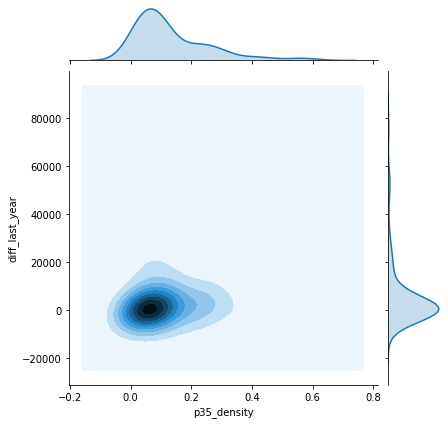

In [139]:
sns.jointplot(data=mali,x='p35_density',y='diff_last_year',kind='kde')

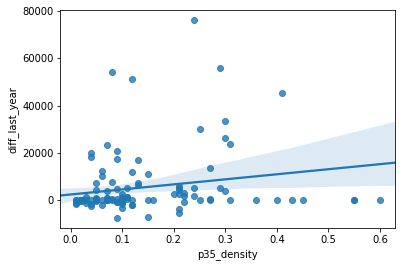

In [142]:
sns.regplot(data=mali,x='p35_density',y='diff_last_year')